<a href="https://colab.research.google.com/github/aky360/A.I./blob/main/Data%20Science/Data%20Analysis1/Stock_price_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
url = "https://raw.githubusercontent.com/aky360/A.I./main/Data%20Science/DataSets/NSE-TATA.csv"
df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [4]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
df.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity             int64
Turnover (Lacs)                float64
dtype: object

In [6]:
df.index=df['Date']
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-09-28,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2010-07-27,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


In [7]:
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

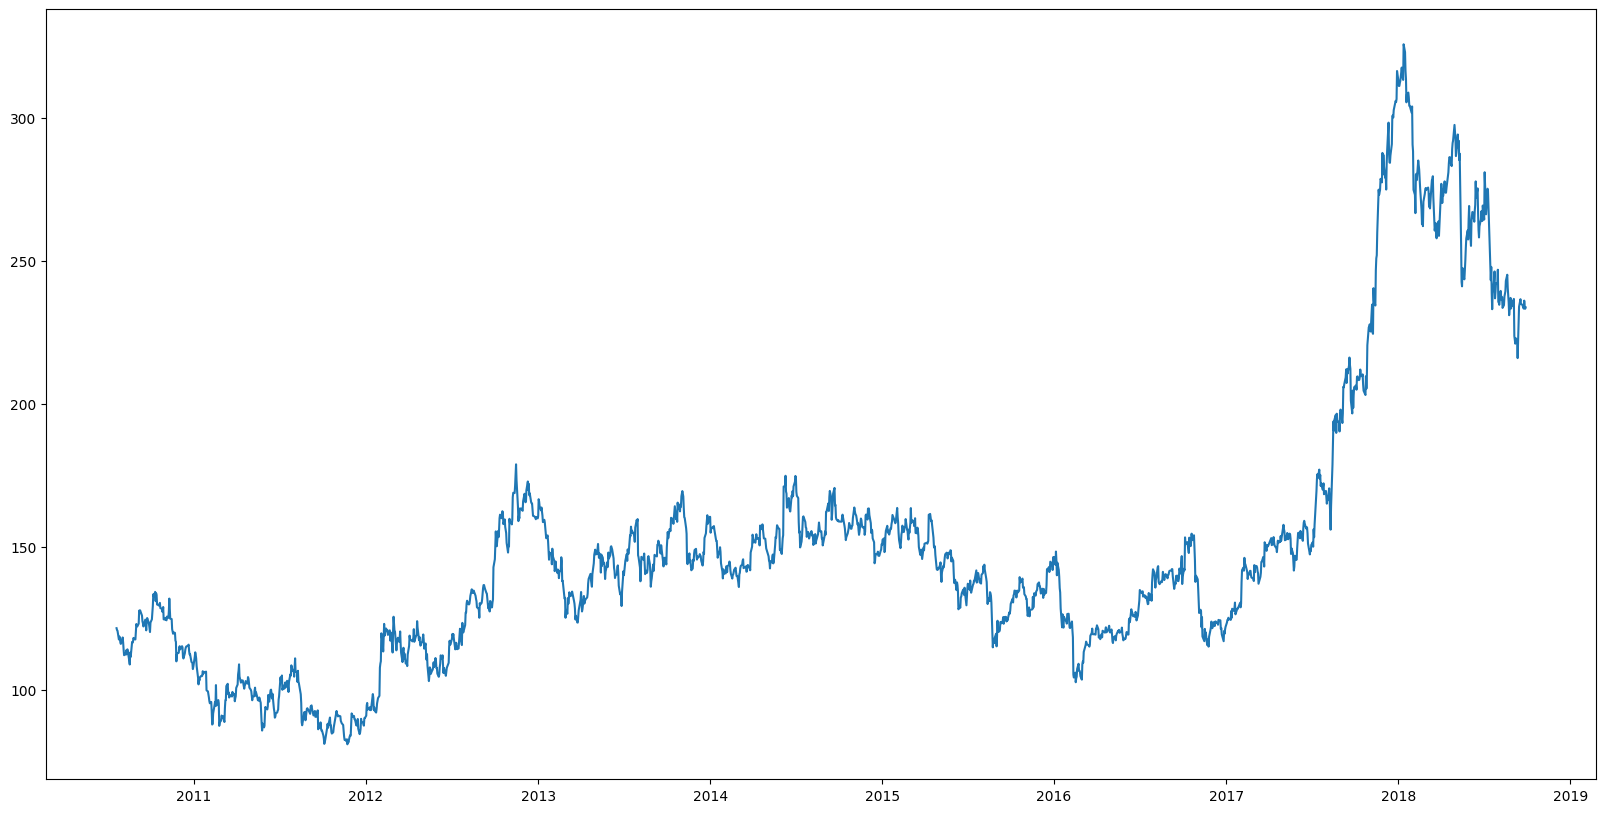

In [8]:
plt.plot(df["Close"],label='Close Price history')

In [9]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-09-28,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [10]:
data=df.sort_index(ascending=True,axis=0)
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-07-21,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [11]:
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
new_dataset

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
2030,NaN,NaN
2031,NaN,NaN
2032,NaN,NaN
2033,NaN,NaN


In [12]:
new_dataset.isnull().sum()

Date     2035
Close    2035
dtype: int64

In [13]:
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

new_dataset["Date"]=pd.to_datetime(new_dataset.Date,format="%Y-%m-%d")
new_dataset.head()

,Date,Close
0,2010-07-21,121.55
1,2010-07-22,120.9
2,2010-07-23,120.65
3,2010-07-26,117.6
4,2010-07-27,118.65


In [14]:
new_dataset.dtypes

Date     datetime64[ns]
Close            object
dtype: object

In [15]:
# new_dataset["Date"]=pd.to_datetime(new_dataset.Date,format="%Y-%m-%d")

In [16]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
final_dataset
# final_dataset = np.datetime_as_string(final_dataset)

# datetimes = [np.datetime64("2020-05-30"), np.datetime64("2020-12-25")]
# np.datetime_as_string(datetimes)

array([[Timestamp('2010-07-21 00:00:00'), 121.55],
       [Timestamp('2010-07-22 00:00:00'), 120.9],
       [Timestamp('2010-07-23 00:00:00'), 120.65],
       ...,
       [Timestamp('2018-09-26 00:00:00'), 234.25],
       [Timestamp('2018-09-27 00:00:00'), 233.25],
       [Timestamp('2018-09-28 00:00:00'), 233.75]], dtype=object)

In [17]:
train_data=final_dataset[0:987,:]
train_data.size

1974

In [18]:
train_data.shape

(987, 2)

In [19]:
valid_data=final_dataset[987:,:]
valid_data.size

2096

In [20]:
valid_data.shape

(1048, 2)

In [21]:
new_dataset.index=new_dataset.Date
new_dataset.head()

,Date,Close
Date,,
2010-07-21,2010-07-21,121.55
2010-07-22,2010-07-22,120.9
2010-07-23,2010-07-23,120.65
2010-07-26,2010-07-26,117.6
2010-07-27,2010-07-27,118.65


In [22]:
new_dataset.drop("Date",axis=1,inplace=True)
new_dataset.head()

,Close
Date,
2010-07-21,121.55
2010-07-22,120.9
2010-07-23,120.65
2010-07-26,117.6
2010-07-27,118.65


In [23]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

TypeError: ignored